# Loading the dataset from Kaggle
***Instacart dataset***

https://www.kaggle.com/competitions/instacart-market-basket-analysis/data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/My Drive/RND4IMPACT'

In [3]:
%cd /content/gdrive/My Drive/RND4IMPACT

/content/gdrive/My Drive/RND4IMPACT


In [4]:
!mkdir instacart

In [6]:
%cd instacart

/content/gdrive/MyDrive/RND4IMPACT/instacart


In [7]:
!kaggle competitions download -c instacart-market-basket-analysis

 96% 188M/196M [00:01<00:00, 167MB/s]
100% 196M/196M [00:01<00:00, 156MB/s]


In [8]:
!ls

instacart-market-basket-analysis.zip


In [9]:
!unzip instacart-market-basket-analysis.zip

Archive:  instacart-market-basket-analysis.zip
  inflating: aisles.csv.zip          
  inflating: departments.csv.zip     
  inflating: order_products__prior.csv.zip  
  inflating: order_products__train.csv.zip  
  inflating: orders.csv.zip          
  inflating: products.csv.zip        
  inflating: sample_submission.csv.zip  


In [14]:
!ls

aisles.csv.zip			      order_products__train.csv.zip
departments.csv.zip		      orders.csv.zip
instacart-market-basket-analysis.zip  products.csv.zip
order_products__prior.csv.zip	      sample_submission.csv.zip


In [21]:
!unzip sample_submission.csv.zip

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   


In [28]:
!pwd

/content/gdrive/MyDrive/RND4IMPACT/instacart


In [33]:
datasets = {}

for i in os.listdir('/content/gdrive/MyDrive/RND4IMPACT/instacart'):
    if i == '__MACOSX' or i == 'instacartorders.csv':
        pass
    elif '.zip' in i:
        pass
    elif (i == 'order_products__prior.csv' or i == 'sample_submission.csv'):
        pass
    else:
        print(i)
        datasets[i] = pd.read_csv("/content/gdrive/MyDrive/RND4IMPACT/instacart/"+i)
    
datasets = dict(sorted(datasets.items()))
datasets.keys()

orders.csv
aisles.csv
departments.csv
order_products__train.csv
products.csv


dict_keys(['aisles.csv', 'departments.csv', 'order_products__train.csv', 'orders.csv', 'products.csv'])

## Data Wrangling

In [10]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import os
import zipfile
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [23]:
quick_test = True

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

orders = pd.read_csv("orders.csv")
if quick_test: prior = pd.read_csv("order_products__prior.csv")[:1000000]
else : prior = pd.read_csv("order_products__prior.csv")
train = pd.read_csv("order_products__train.csv")
products = pd.read_csv("products.csv")
aisle = pd.read_csv("aisles.csv")
department = pd.read_csv("departments.csv")

In [25]:
temp = pd.merge(prior, products, on=["product_id"])
temp = pd.merge(temp, orders, on=["order_id"])
temp = pd.merge(temp, aisle, on=["aisle_id"])
data = pd.merge(temp, department, on=["department_id"])
del temp
data

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,30852,47713,1,1,Sparkling Rose,134,5,123718,prior,15,0,12,7.0,specialty wines champagnes,alcohol
999996,77392,47713,1,1,Sparkling Rose,134,5,95228,prior,2,6,17,6.0,specialty wines champagnes,alcohol
999997,31925,22199,1,0,Extra-Dry Cava,134,5,47329,prior,4,3,10,12.0,specialty wines champagnes,alcohol
999998,31925,24968,2,1,Sonoma Brut Sparkling Wine,134,5,47329,prior,4,3,10,12.0,specialty wines champagnes,alcohol


In [26]:
display(data.product_name.value_counts()[:10])

Banana                    14759
Bag of Organic Bananas    11867
Organic Strawberries       8138
Organic Baby Spinach       7477
Organic Hass Avocado       6551
Organic Avocado            5379
Large Lemon                4700
Strawberries               4388
Limes                      4317
Organic Raspberries        4238
Name: product_name, dtype: int64

## Data Analysis

### Group orders by products and get how many times each product was ordered


In [27]:
g = data.product_id.value_counts()
g = pd.DataFrame(g)
g.reset_index(inplace=True)
g.columns = ["product_id", "count"]

In [34]:
g_products = g.merge(datasets['products.csv'], on="product_id")
g_products.head()

,product_id,count,product_name,aisle_id,department_id
0,24852,14759,Banana,24,4
1,13176,11867,Bag of Organic Bananas,24,4
2,21137,8138,Organic Strawberries,24,4
3,21903,7477,Organic Baby Spinach,123,4
4,47209,6551,Organic Hass Avocado,24,4


<Figure size 3600x2880 with 0 Axes>

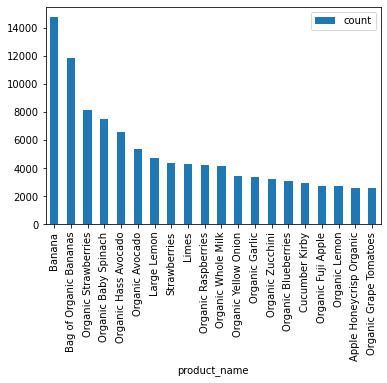

In [35]:
plt.figure(figsize=(50, 40))
g_products.head(20).plot(kind="bar", x="product_name", y="count")
plt.show()

### Find the number of orders per department

In [37]:
g = data.department_id.value_counts()
g = pd.DataFrame(g)
g.reset_index(inplace=True)
g.columns = ["department_id", "count"]
g_dept = g.merge(datasets['departments.csv'], on="department_id")
g_dept.head()

,department_id,count,department
0,4,292208,produce
1,16,167077,dairy eggs
2,19,89230,snacks
3,7,83125,beverages
4,1,68808,frozen


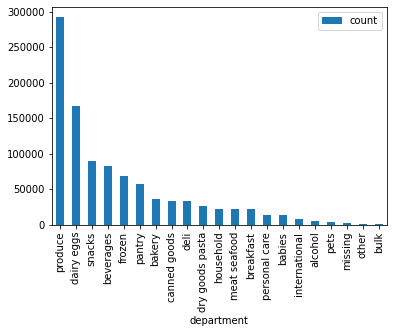

In [38]:
g_dept.plot(kind="bar", x="department", y="count")
plt.show()

### **The frequency of orders on days**

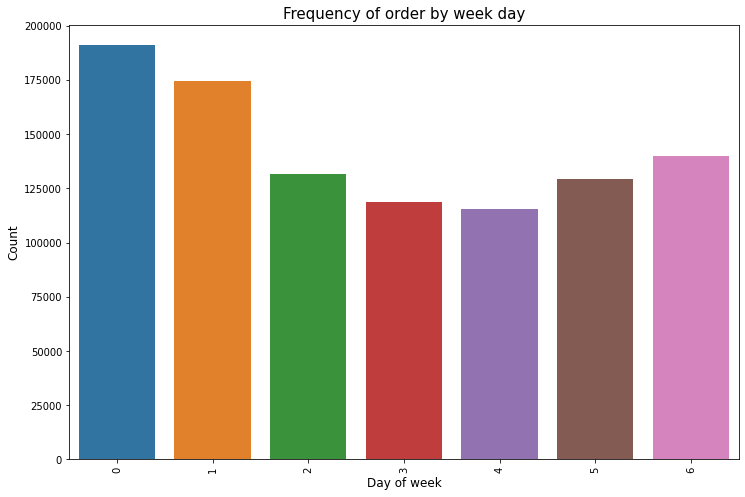

In [39]:
plt.figure(figsize=(12,8))
sns.countplot(x='order_dow', data=data)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

### **The frequency of orders - hours of the day**


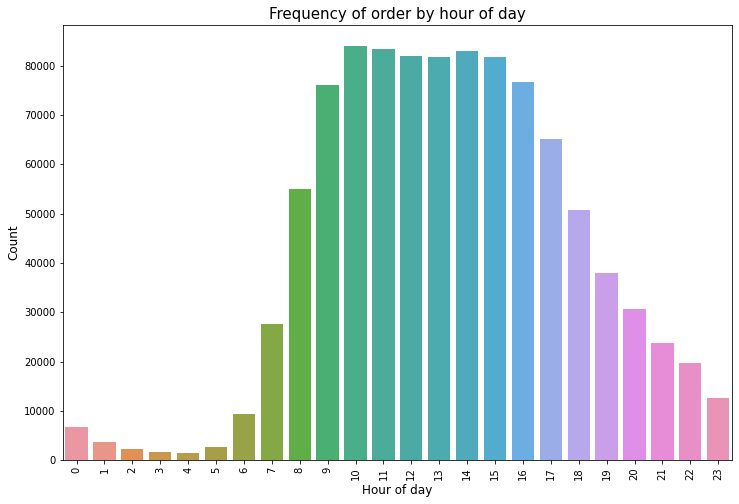

In [40]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=data)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

## Apriori Algorithm to create Recommender system

In [41]:
product_counts = data.groupby('product_id')['order_id'].count().reset_index().rename(columns = {'order_id':'frequency'})
product_counts = product_counts.sort_values('frequency', ascending=False)[0:100].reset_index(drop=True)
product_counts.head(10)

,product_id,frequency
0,24852,14759
1,13176,11867
2,21137,8138
3,21903,7477
4,47209,6551
5,47766,5379
6,47626,4700
7,16797,4388
8,26209,4317
9,27966,4238


In [42]:
freq_products = list(product_counts.product_id)
freq_products[1:10]

[13176, 21137, 21903, 47209, 47766, 47626, 16797, 26209, 27966]

In [43]:
order_products = data[data.product_id.isin(freq_products)]
order_products.shape

(231000, 15)

In [44]:
basket = order_products.pivot_table(columns='product_name', values='reordered', index='order_id').reset_index().fillna(0).set_index('order_id')

In [45]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
basket = basket.applymap(encode_units)
basket.head()


product_name,100% Raw Coconut Water,100% Whole Wheat Bread,2% Reduced Fat Milk,Apple Honeycrisp Organic,Asparagus,Bag of Organic Bananas,Banana,Bartlett Pears,Blueberries,Boneless Skinless Chicken Breasts,...,Sparkling Natural Mineral Water,Sparkling Water Grapefruit,Spring Water,Strawberries,Uncured Genoa Salami,Unsalted Butter,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Whole Milk,Yellow Onions
order_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### **Applying the algorithm**

In [46]:
shortbasket = basket[:100000]

In [47]:
frequent_items = apriori(shortbasket, min_support=0.01, use_colnames=True)
frequent_items.head()

,support,itemsets
0,0.012644,(100% Raw Coconut Water)
1,0.019242,(100% Whole Wheat Bread)
2,0.012354,(2% Reduced Fat Milk)
3,0.026958,(Apple Honeycrisp Organic)
4,0.016909,(Asparagus)


In [48]:
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(Organic Raspberries),(Organic Strawberries),0.044501,0.086864,0.010283,0.231079,2.660259,0.006418,1.187556
29,(Organic Strawberries),(Organic Raspberries),0.086864,0.044501,0.010283,0.118386,2.660259,0.006418,1.083805
14,(Organic Fuji Apple),(Banana),0.026502,0.171532,0.010214,0.385417,2.246904,0.005668,1.348015
15,(Banana),(Organic Fuji Apple),0.171532,0.026502,0.010214,0.059548,2.246904,0.005668,1.035138
5,(Bag of Organic Bananas),(Organic Raspberries),0.135810,0.044501,0.013251,0.097571,2.192531,0.007207,1.058807
4,(Organic Raspberries),(Bag of Organic Bananas),0.044501,0.135810,0.013251,0.297767,2.192531,0.007207,1.230632
2,(Bag of Organic Bananas),(Organic Hass Avocado),0.135810,0.071639,0.020870,0.153674,2.145131,0.011141,1.096931
3,(Organic Hass Avocado),(Bag of Organic Bananas),0.071639,0.135810,0.020870,0.291329,2.145131,0.011141,1.219453
27,(Organic Strawberries),(Organic Hass Avocado),0.086864,0.071639,0.012381,0.142539,1.989701,0.006159,1.082687
26,(Organic Hass Avocado),(Organic Strawberries),0.071639,0.086864,0.012381,0.172832,1.989701,0.006159,1.103932
